# DataFrames en Pandas

---

**Autor:** César Husillos Rodríguez

**Email:** c.husillos@igme.es

---

## 1. ¿Qué es un DataFrame?

Un DataFrame de Pandas es una estructura de datos bidimensional que se define dentro del paquete *Pandas*. Por asimilarlo a algo conocido, podemos decir que es una "*tabla con esteroides*".

## 2. ¿Cómo se crean?

Una tabla siempre tiene dos dimensiones aunque sólo tenga una fila (1xn) o una columna (nx1).

Al igual que con las Series, existen múltiples formas de generar un DataFrame. La más directa es a partir de un objeto 2D, como una lista de listas o un array de NumPy.

Evidentemente, lo primero es importar las librerías que necesitamos: NumPy y Pandas.

In [1]:
import numpy as np
import pandas as pd

In [2]:
datos = np.arange(12)
print(datos)
print('Forma del array =', datos.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
Forma del array = (12,)


El array de NumPy que acabamos de generar es un array 1D ya que su atributo *shape* devuelve sólo una dimensión. Convertimos el array plano anterior a un array 2D. Existen, de nuevo muchas formas. Una de ellas es utilizando el método *reshape* de ese array, en la forma

In [3]:
datos = datos.reshape((3, 4))
print(datos)
print('Nueva forma del array =', datos.shape)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Nueva forma del array = (3, 4)


Ahora, generamos nuestro DataFrame de Pandas pasando el objeto 2D que acabamos de crear al *constructor* de la clase que genera ese tipo de objetos. En su forma más genérica el constructor recibe los siguientes parámetros:


In [ ]:
# help(pd.DataFrame)

No todos los parámetros son obligatorios. En realidad, con que le pasemos los datos (a través de *data*) es suficiente.

Tipo del objeto creado =  <class 'pandas.core.frame.DataFrame'>
   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
<class 'numpy.ndarray'>
(3, 4)


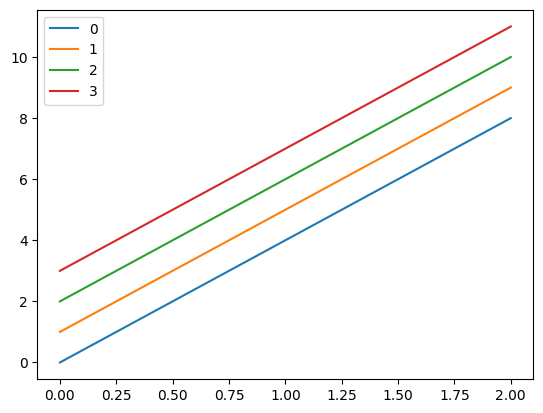

In [14]:
dataframe1 = pd.DataFrame(data=datos)
print('Tipo del objeto creado = ', type(dataframe1))
print(dataframe1)
dataframe1.plot()
print(type(dataframe1.values))
print(dataframe1.shape)

**PREGUNTA:** ¿De qué forma generaría un DataFrame 1D? Elija entre las opciones siguientes.

In [6]:
# Opción (a)
datos2 = np.full((12, 1), 10)
print('Array generado ->', datos2)
print('Dimensiones del nuevo array:', datos2.shape)
dataframe1d_0 = pd.DataFrame(data=datos2)
print('Tipo del objeto creado = ', type(dataframe1d_0))
print(dataframe1d_0)

Array generado -> [[10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]
 [10]]
Dimensiones del nuevo array: (12, 1)
Tipo del objeto creado =  <class 'pandas.core.frame.DataFrame'>
     0
0   10
1   10
2   10
3   10
4   10
5   10
6   10
7   10
8   10
9   10
10  10
11  10


In [7]:
# Opción (b)
dataframe1d_1 = pd.DataFrame(data=['Madrid', 'Barcelona', 'Bilbao', 'Valencia', 'Málaga']) # DataFrame a partir de una lista PYTHON
print(dataframe1d_1)
print(type(dataframe1d_1))

           0
0     Madrid
1  Barcelona
2     Bilbao
3   Valencia
4     Málaga
<class 'pandas.core.frame.DataFrame'>


In [8]:
# Opción (c)
dataframe1d_2 = pd.DataFrame.from_dict({'Comunidad de Madrid': ['Madrid'], 'Cataluña': ['Barcelona'], \
                                        'Pais Vasco': ['Bilbao'], 'Comunidad valenciana': ['Valencia'], \
                                        'Andalucía': ['Málaga']}) # DataFrame a partir de un diccionario PYTHON
print(dataframe1d_2)
print(type(dataframe1d_2))

  Comunidad de Madrid   Cataluña Pais Vasco Comunidad valenciana Andalucía
0              Madrid  Barcelona     Bilbao             Valencia    Málaga
<class 'pandas.core.frame.DataFrame'>


Como adelanto de la funcionalidad disponible en los DataFrames existe la posibilidad de trasponer un objeto de este tipo. Fíjese en el resultado siguiente:

In [9]:
dataframe1d_2 = dataframe1d_2.transpose()
print(dataframe1d_2)

                              0
Comunidad de Madrid      Madrid
Cataluña              Barcelona
Pais Vasco               Bilbao
Comunidad valenciana   Valencia
Andalucía                Málaga


In [10]:
# Opción (d)
mi_serie = pd.Series(data=('Madrid', 'Barcelona', 'Bilbao', 'Valencia', 'Málaga'), \
                     name='Ciudades') # DataFrame a partir de una Serie
dataframe1d_3 = pd.DataFrame(mi_serie)
print(dataframe1d_3)
print(type(dataframe1d_3))

    Ciudades
0     Madrid
1  Barcelona
2     Bilbao
3   Valencia
4     Málaga
<class 'pandas.core.frame.DataFrame'>


In [11]:
# Opción (e)
with open('./ficheros/datos_serie.csv') as fichero:
    print(fichero.read())

dataframe1d_4 = pd.read_csv('./ficheros/datos_serie.csv') # DataFrame a partir del contenido de un fichero
print(dataframe1d_4)
print(type(dataframe1d_4))

velocidades
1.3
5.1
3.3
8.9
12.0
7.1
3.8
   velocidades
0          1.3
1          5.1
2          3.3
3          8.9
4         12.0
5          7.1
6          3.8
<class 'pandas.core.frame.DataFrame'>


---

**Ejercicios:** Con lo que acabamos de ver, intente realizar los ejercicios 1 y 2.

---

## 3. ¿Cómo es su estructura?

Según hemos visto, consiste en un **conjunto de datos** y otros dos elementos más:

* unos **índices para las filas**.
* otros **índices para las columnas**.

En caso de no asignar valores concretos a los índices de forma explícita durante la generación del DataFrame, la indexación se genera automáticamente de forma implícita.

### 3.1. Índices de filas

Los índices de fila se obtienen a partir del atributo *index* del DataFrame:

In [15]:
dataframe1 = pd.DataFrame(data = np.arange(12).reshape((3, 4)))
print(dataframe1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [16]:
# índices de filas
print(dataframe1.index)

RangeIndex(start=0, stop=3, step=1)


In [17]:
# Contenido de ese objeto de tipo RangeIndex
print(list(dataframe1.index))

[0, 1, 2]


In [21]:
dataframe1[0] # Parece contraintuitivo. Tendria que dar la fila 0

0    0
1    4
2    8
Name: 0, dtype: int32

### 3.2. Índices de columnas

Para acceder a los índices de columnas, accedemos al atributo *columns* del DataFrame

In [18]:
dataframe1.columns

RangeIndex(start=0, stop=4, step=1)

In [19]:
list(dataframe1.columns)

[0, 1, 2, 3]

### 3.3. Datos

Acceso a los datos de un DataFrame a través del atributo *values*.

In [22]:
dataframe1.values

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [23]:
dataframe1.values.shape

(3, 4)

In [24]:
dataframe1.values.dtype.name

'int32'

### 3.4. Renombrado de filas

El procedimiento explicado para Series es válido en este punto (método *reindex*).
Partimos del DataFrame

In [25]:
print(dataframe1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [27]:
idn_filas = [3, 2, 1, 0]
dataframe2 = dataframe1.reindex(idn_filas)
print(dataframe2) # te pone float porque nan se codifica como float, entonces hace un casting ampliando el tipo de datos a todos

     0    1     2     3
3  NaN  NaN   NaN   NaN
2  8.0  9.0  10.0  11.0
1  4.0  5.0   6.0   7.0
0  0.0  1.0   2.0   3.0


Vemos que (al igual que con las Series) este método permite reorganizar las filas. Dado un nuevo elemento del índice no existente previamente, genera una fila con valores *nan* para ese valor.

Si lo que queremos es cambiar los valores de los índices de filas manteniendo su orden, lo que hay que hacer es modificar el atributo *index* del DataFrame.

In [29]:
idn_filas = ['primera', 'segunda', 'tercera']
dataframe1.index = idn_filas
print(dataframe1)

         0  1   2   3
primera  0  1   2   3
segunda  4  5   6   7
tercera  8  9  10  11


**NOTA:** Debe asegurarse que el número de elementos de nuevo índice de filas coincida con el número de filas del DataFrame. De no ser así, se generará un error, como muestra el siguiente código.

In [30]:
idn_filas = ['primera', 'segunda', 'tercera', 'cuarta']
dataframe1.index = idn_filas
print(dataframe1)

ValueError: Length mismatch: Expected axis has 3 elements, new values have 4 elements

### 3.5. Renombrado de columnas

El nombre de las columnas puede ser asignado (al igual que el de las filas) cuando se genera un DataFrame. Veamos un ejemplo.

In [31]:
dataframe3 = pd.DataFrame(data=np.arange(12).reshape((4, 3)), \
                          index=['1a', '2a', '3a', '4a'], \
                          columns=['primera', 'segunda', 'tercera'])
print(dataframe3)

    primera  segunda  tercera
1a        0        1        2
2a        3        4        5
3a        6        7        8
4a        9       10       11


Una vez generado el DataFrame, es posible cambiar los índices explícitos de filas (como hemos visto ya) y columnas. Para esta últimas, el procedimiento es similar. Existen dos alernativas también: usar el método *reindex* o modificar el atributo *columns*.

In [32]:
# usar reindex
dataframe4 = dataframe3.reindex(['primera', 'tercera', 'segunda', 'cuarta'], \
                                axis=1) # axis 1 es para hacerlo a las columnas
print(dataframe4)

    primera  tercera  segunda  cuarta
1a        0        2        1     NaN
2a        3        5        4     NaN
3a        6        8        7     NaN
4a        9       11       10     NaN


Como ve, *reindex* reorganiza las columnas del DataFrame si los nombres propuestos coindicen con los existentes. Si no es el caso, genera una nueva columna con *nan*'s.

In [33]:
# usar el atributo 'columns'
dataframe3.columns = [1, 2, 3] #estoy machacando las columns
print(dataframe3)

    1   2   3
1a  0   1   2
2a  3   4   5
3a  6   7   8
4a  9  10  11


El funcionamiento y las restricciones en el uso de ambos procedimientos es el mismo que para el caso de índices de fila.

### 3.6. Estableciendo una columna como índice del DataFrame

También podemos hacer que una columna del DataFrame pase a ser el índice las filas. Podemos mantenerlo en el conjunto de datos o eliminarlo tras establecerlo como índice.

Para hacerlo, usamos el método

donde el parámetro *drop* establece si debe borrarse la columna del DataFrame cuando se establece como índice.

**NOTA:** Recuerde que **los valores de un índice deben ser únicos**, es decir, que no se pueden repetir. 

In [34]:
# Partimos para los ejemplos de este DataFrame
dataframe3 = pd.DataFrame(data=np.arange(12).reshape((4, 3)), \
                          index=['1a', '2a', '3a', '4a'], \
                          columns=['primera', 'segunda', 'tercera'])
print(dataframe3)

    primera  segunda  tercera
1a        0        1        2
2a        3        4        5
3a        6        7        8
4a        9       10       11


In [36]:
# establezco la columna de indice 'segunda' como nuevo índice de filas
print(dataframe3.set_index('segunda')) # por defecto es drop = True
# indice explicito seria 1,4,7,10. Se puede acceder como df[segunda][1]
# indice explicito es 0,1,2,3. se acceder como df[segunda].iloc[0]

         primera  tercera
segunda                  
1              0        2
4              3        5
7              6        8
10             9       11


In [41]:
# varias columnas como indices
dataframe3 = pd.DataFrame(data=np.arange(12).reshape((4, 3)), \
                          index=['1a', '2a', '3a', '4a'], \
                          columns=['primera', 'segunda', 'tercera'])
df = (dataframe3.set_index(['segunda', 'tercera'], drop=True))
print(df)

print(df['primera'][1,2] )# se accede asi
print(df['primera'][1][2]) # o se accede asi

                 primera
segunda tercera         
1       2              0
4       5              3
7       8              6
10      11             9
0
0


Algunos métodos como *set_index* por defecto no cambian el objeto al que pertenecen. Para hacerlo debería asignarlo a otra variable. Es por eso que, si mostramos *dataframe3*, tiene el índice original

In [ ]:
print(dataframe3)

Ahora probemos a mantener la columna como parte del DataFrame tras usarla como índice. Estableceremos el parámetro *drop* a False.

In [ ]:
print(dataframe3.set_index('segunda', drop=False))

### 3.7. Borrado de índices

El borrado se refiere a los índices explícitos, tanto de filas como de columnas.

Se usa el método *reset_index*, que **pone todos los índices a sus valores implícitos**. 

Uno de los parámetros de ese método es *drop*, que es un booleano que por defecto está a False. Veamos cómo funciona con ejemplos.

In [ ]:
print(dataframe3)

In [ ]:
dataframe4 = dataframe3.reset_index()
print(dataframe4)
#  te pone el indice explicito que tenias comouna columna mas, y le pone a la columna el nombre de index. Esto es con el valor por defecto de false
#  Pero si le pones drop = true, se carga el indice explicito y la columna se pierde

### 3.8. Agregar y quitar columnas a un DataFrame


Agregar columnas es sencillo. Basta con escribir el nombre de un DataFrame seguido de una clave que no existe entre corchetes y de un array de la misma longitud que el número de filas del DataFrame. Como ejemplo: 

In [44]:
print(dataframe4)

    primera  segunda  tercera
1a        0        1        2
2a        3        4        5
3a        6        7        8
4a        9       10       11


In [45]:
dataframe4['apellido'] = np.array(['Rodriguez', 'Pérez', 'Acosta', 'Hernández'])

In [46]:
print(dataframe4)

    primera  tercera  segunda  cuarta   apellido
1a        0        2        1     NaN  Rodriguez
2a        3        5        4     NaN      Pérez
3a        6        8        7     NaN     Acosta
4a        9       11       10     NaN  Hernández


Para eliminar una columna o varias columnas de un DataFrame, se llama al método *drop* y se le pasa por parámetros el nombre del campo o una lista con nombres de campos a borrar y el parámetro *axis=1* que se refiere a columnas.

In [47]:
dataframe4.drop('apellido', axis=1) # axis1 elimina índice por columna

,primera,tercera,segunda,cuarta
1a,0,2,1,NaN
2a,3,5,4,NaN
3a,6,8,7,NaN
4a,9,11,10,NaN


In [48]:
dataframe4.drop(['apellido', 'cuarta'], axis=1) 

,primera,tercera,segunda
1a,0,2,1
2a,3,5,4
3a,6,8,7
4a,9,11,10


---

**Ejercicios:** Con lo que acabamos de ver, intente realizar los ejercicios 3, 4, 5 y 6.

---

## 4. Propiedades básicas

In [49]:
dataframe1 = pd.DataFrame(data = np.arange(12).reshape((3, 4)))
print(dataframe1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


### 4.1. Dimensiones del DataFrame

Número de filas y columnas de un DataFrame a través del atributo *shape*.

In [ ]:
dataframe1.shape

Podemos gestionar la tupla que nos devuelve el atributo *shape* como queramos. Aquí le muestro otras dos formas de hacerlo.

In [ ]:
# dimensiones del conjunto de datos
nfilas, ncols = dataframe1.shape # almacenamos la tupla que devuelve shape en dos variables
# mostramos esas variables
print(f'(filas x columnas) = ({nfilas}, {ncols})')

In [52]:
# Otra forma de acceder al número de filas y de columnas a través del atributo shape
nfilas = dataframe1.shape[0]
ncols = dataframe1.shape[1]
# mostramos esas variables
print(f'filas = {nfilas}, columnas = {ncols}')

filas = 3, columnas = 4


Como alternativa, las dimensiones de un DataFrame también puede obtenerse a partir del número de filas y de columnas.

In [50]:
# obtener el número de filas
print(dataframe1.index.size)

3


In [51]:
# obtener el número de columnas
print(dataframe1.columns.size)

4


### 4.2. Tipos de datos almacenados en un DataFrame

Tipo de datos almacenados: mediante el atributo *dtypes*.

In [53]:
print(dataframe1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [54]:
dataframe1.dtypes

0    int32
1    int32
2    int32
3    int32
dtype: object

**MUY IMPORTANTE**: 

Un DataFrame puede almacenar múltiples tipos de datos a la vez, pero **dentro de una columna los elementos son del mismo tipo**.

Hagámoslo explícito con un ejemplo mas heterogéneo.

In [55]:
dataframe5 = pd.DataFrame.from_dict({'nombre': ['Marina', 'José', 'Pedro', 'Luisa', 'Manuel'], \
                                     'edad': [12, 14, 10, 9, 12], \
                                     'nota media': [6.2, 3.7, 5.6, 9.6, 7.9], \
                                     'Mejorable': [False, True, True, False, False]})
print('Muestro el dataframe...')
print(dataframe5)

# indice de filas
print('\nIndice de filas:', list(dataframe5.index))

# nombres de columnas
print('\nÍndice de columnas: ', dataframe5.columns.values)

Muestro el dataframe...
   nombre  edad  nota media  Mejorable
0  Marina    12         6.2      False
1    José    14         3.7       True
2   Pedro    10         5.6       True
3   Luisa     9         9.6      False
4  Manuel    12         7.9      False

Indice de filas: [0, 1, 2, 3, 4]

Índice de columnas:  ['nombre' 'edad' 'nota media' 'Mejorable']


Veamos qué tipos de columnas tenemos en nuestro DataFrame.

In [56]:
print('\nTipos de datos para cada columna del dataframe:')
print(dataframe5.dtypes)


Tipos de datos para cada columna del dataframe:
nombre         object
edad            int64
nota media    float64
Mejorable        bool
dtype: object


## 5. Acceso a los elementos de un DataFrame

También se denomina *slicing* (rebanado, loncheado...)

La forma de acceder a los datos de un DataFrame es a partir de sus índices de fila y columna.

Dado que existen dos formas de indexar, la implícita y la explícita, existen **dos formas de acceder a los elementos de un DataFrame**.

**NOTA:** Aunque no se definan índices implícitos, éstos siempre están definidos. Las coordenadas de cada dato de un DataFrame vendrán dadas siempre como las posiciones de la fila y la columna (ambos valores numéricos) que lo localizan en la "tabla"/DataFrame.

### 5.1. Usando índices implícitos

Los índices implícitos vienen dados por una secuencia de números enteros consecutivos mayores o iguales a cero.

De esta forma, el índice implícito (o de posición) de la primera fila siempre tiene por valor el cero. Igual con la primera columna. Se usa el atributo **iloc[]** para obtener filas, columnas, rangos o elementos únicos de un DataFrame a partir de su posición.

La sintaxis de acceso es la siguiente:

* Acceso a **un elemento concreto**: nombre_dataframe.iloc[índice_fila, índice_columna]
* Acceso a toda **una fila**: nombre_dataframe.iloc[índice_fila,:]
* Acceso a toda **una columna**: nombre_dataframe.iloc[:,índice_columna]

Veamoslo con algunos ejemplos.

In [57]:
dataframe3 = pd.DataFrame(data=np.arange(12).reshape((4, 3)), \
                          index=['f1', 'f2', 'f3', 'f4'], \
                          columns=['c1', 'c2', 'c3'])
print(dataframe3)

    c1  c2  c3
f1   0   1   2
f2   3   4   5
f3   6   7   8
f4   9  10  11


In [58]:
# Elemento de la segunda fila y tercera columna
data12 = dataframe3.iloc[1, 2] # las mismas posibilidades de seleccion que un array 2d
print(data12)

5


In [59]:
# Tercera fila
fila3 = dataframe3.iloc[2,:]
print(fila3)

c1    6
c2    7
c3    8
Name: f3, dtype: int32


In [60]:
# Segunda columna
columna2 = dataframe3.iloc[:,1]
print(columna2)

f1     1
f2     4
f3     7
f4    10
Name: c2, dtype: int32


**PREGUNTA:** Siempre que realicemos una operación de selección en un DataFrame o Serie deberíamos ser conscientes del tipo de objeto que obtenemos como resultado. Así que, ¿puede decirme alguien de qué tipos son las variables *data12*, *fila3* y *columna2*?

Ahora la cuestión es, ¿podría obtener varias filas y columnas simultáneamente? ¿En cualquier orden y/o rango?

La sintaxis genereal sería:
* para **rangos**: nombre_dataframe.iloc[fila_inicial:fila_final, columna_inicial:columna_fila]
* para **posiciones personalizadas**: nombre_dataframe.iloc[[fila1, fila2,..., filaN],[columna1, columna2,...,columnaN]]

Como siempre, todo se ve mejor con ejemplos.

In [ ]:
print(dataframe3)

In [61]:
# las dos primeras filas y las 2 ultimas columnas
filas_y_columnas = dataframe3.iloc[:2,-2:]
print(filas_y_columnas)

    c2  c3
f1   1   2
f2   4   5


In [62]:
# Los elementos contenidos en la primera y última fila y en la primera y ultima columna ("esquinas" del DataFrame)
esquinas = dataframe3.iloc[[0,-1], [0,-1]]
print(esquinas)

    c1  c3
f1   0   2
f4   9  11


In [63]:
# También podemos pasarle índices cualesquiera que se generen un una función arange (NUMPY) o range (PYTHON)
subdataframe3 = dataframe3.iloc[np.arange(1,4,2), range(0,3,2)]
print(subdataframe3)

    c1  c3
f2   3   5
f4   9  11


Posibilidades casi infinitas.

### 5.2. Usando índices explícitos

Se recuerda que los índices explícitos son aquellos que se establecen de forma intencionada con el fin de facilitar el acceso a filas y columnas de un DataFrame. Se trabaja con ellos porque es más fácil asociar una cadena de texto, un identificador numérico preestablecido o de fecha con una fila o columna que los enteros relacionados con la posición que proporcionan los índices implícitos. Aunque en algunas ocasiones trabajar con posiciones es también de utilidad, sobre todo con DataFrames con un número elevado de elementos.

Para trabajar con índices explícitos usaremos el atributo **loc[]** de los DataFrames de forma que:

| Selección | Sintaxis|
| :-- | :-- |
| una fila | nombre_dataframe.loc[indice_fila,:]|
| una columna | nombre_dataframe.loc[:, indice_columna]|
| un único elemento | nombre_dataframe.loc[indice_fila, indice_columna]|
| un rango | nombre_dataframe[indice_fila_inicial:indice_fila_final, indice_columna_inicial:indice_columna_final]|
| cualquier orden | nombre_dataframe[[indice_fila_1, ..., indice_fila_N], [indice_columna_1,...,indice_columna_M]]|

Lo vemos de nuevo con ejemplos:

In [ ]:
dataframe3 = pd.DataFrame(data=np.arange(12).reshape((4, 3)), \
                          index=['f1', 'f2', 'f3', 'f4'], \
                          columns=['c1', 'c2', 'c3'])
print(dataframe3)

In [ ]:
# para seleccionar la cuarta fila
print(dataframe3.loc['f4',])

In [ ]:
# para seleccionar la primera columna
print(dataframe3.loc[:,'c1'])

In [ ]:
# selección del elemento de la tercera fila y primera columna
print(dataframe3.loc['f3', 'c1'])

In [ ]:
# selección de la segunda y tercera filas de las columnas primera y segunda
print(dataframe3.loc['f2':'f3','c1':'c2'])

In [ ]:
# mostrar la tercera columna de la primera y tercera fila
print(dataframe3.loc[['f1','f3'], 'c3'])

### 5.3. Forma mixta

Es aquella que selecciona por posición en una dimensión y por nombre de índice en la otra.

**NOTA:** Había un método llamado **ix** que permitía hacerlo, pero se marcó como obsoleto en la version 0.20.0 de Pandas.

La sintaxis general es la siguiente: 

*nombre_dataframe[indice_columna][[indice_fila1,...,indice_filaN]]* 
*nombre_dataframe[indice_columna][[indice_filaM:indice_filaN]]* 

donde *indice_columna* pueden tomar valores de índice explícito e *indice_filaX* valores de índice implícito (numérico). Veamos un ejemplo:

In [ ]:
print(dataframe3)

In [ ]:
print(dataframe3['c3'][0])

In [ ]:
print(dataframe3['c3'].iloc[0])

In [ ]:
print(dataframe3['c1'][2:3])

### 5.4. Otra forma de acceso a columna/s (¿Explicar?)

La forma más sencilla de **acceder a una columna** es poner el nombre de la columna entre corchetes justo después del nombre del dataframe.

In [ ]:
# dataframe de ejemplo
dataframe3 = pd.DataFrame(data=np.arange(12).reshape((4, 3)), \
                          index=['f1', 'f2', 'f3', 'f4'], \
                          columns=['c1', 'c2', 'c3'])
print(dataframe3)

In [ ]:
columna1 = dataframe3['c1']
print(columna1)

**PREGUNTA:** ¿De qué tipo es el objeto almacenado en la variable *columna1*?

In [ ]:
print(type(columna1))

También se podría extraer la columna de índice *nombre* con esta otra notación.

In [ ]:
columna1_bis = dataframe3.c1
print(columna1_bis)
type(columna1_bis)

e, igualmente, es un objeto de tipo Series de Pandas.

Si queremos **acceder a varias columnas** del dataframe, bastaría con escribir los nombres de las columnas entre corchetes justo detras del nombre de la variable que contiene el DataFrame.

In [ ]:
df_columnas = dataframe3[['c1', 'c3']] 
print(df_columnas)

**PREGUNTA:** ¿De qué tipo es el objeto resultante de seleccionar varias columnas de un DataFrame?

También podemos seleccionar una columna de esta forma:

In [ ]:
columna1_bis_2 = dataframe3[['c1']]
print(columna1_bis_2)

**PREGUNTA:** ¿Hay diferencias entre las variables *columna1*, *columna1_bis* y *columna1_bis_2*?

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar los ejercicios 7, 8, 9 y 10.

---

## 6. Análisis descriptivo de un DataFrame

**pandas.DataFrame.describe()** genera estadísticas descriptivas que incluyen aquellas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores NaN.

In [ ]:
df_columnas.describe()

**pandas.DataFrame.info()** imprime información completa sobre un DataFrame. Esto incluye detalles sobre el tipo de datos del índice, las columnas, el recuento de valores no nulos en cada columna y el uso de memoria.

In [ ]:
df_columnas.info()

En los proyectos de ciencia de datos, la cantidad de datos puede ser grande y, a menudo, no es necesario acceder a todas las filas de datos a la vez. En cambio, es común necesitar solo las primeras o las últimas filas para fines de análisis o inspección. Esto es particularmente aplicable cuando los datos tienen una estructura consistente, y cada fila tiene el mismo conjunto de columnas.

Al utilizar funciones como **.head()** o **.tail()**, puede acceder fácilmente a un número específico de filas desde el principio o el final del DataFrame, respectivamente. Estas funciones son formas eficientes de examinar rápidamente un subconjunto de datos sin cargar todo el conjunto de datos, lo que puede consumir mucho tiempo y recursos.

La función **DataFrame.tail(n=5)** en pandas devuelve las últimas *n* filas del DataFrame según su posición. Esta función es particularmente útil para verificar datos rápidamente, como después de realizar la clasificación o agregar filas al DataFrame.

In [ ]:
df_columnas.tail(2)

El método *count*, por defecto hace un recuento por columnas del número de registros que no tienen valores nulos.

In [ ]:
df_columnas.count()

## 7. Filtrado de un DataFrame

No siempre me interesa toda la información contenida en un DataFrame. Por eso hemos aprendido a seleccionar filas, columnas y rangos de ambos para obtener un subconjunto de datos a partir del original.

Pero en muchas ocasiones, de la información disponible me interesa trabajar sólo con una parte. Por ejemplo, días con precipitación, profundidad por debajo de cierto umbral, eventos ocurridos entre dos fechas concretas... o cualquier combinación de las variables de interés. Aquí es donde entran en juego el mecanismo de filtrado de los DataFrames de Pandas.

Vamos a trabajar esta parte a partir de los datos proporcionados por un fichero de empleados disponible en GitHub, a través de esta URL:

https://github.com/sivabalanb/Data-Analysis-with-Pandas-and-Python/blob/master/employees.csv

In [ ]:
import pandas as pd
df_empleados = pd.read_csv('employees.csv')
print(df_empleados)

In [ ]:
df_empleados.info()

In [ ]:
len(set(df_empleados.loc[:,'First Name'].values)) # Nombres únicos

Una forma común de filtrar un DataFrame por ciertos valores de columna es mediante el uso de indexación booleana. Es decir, se crea una condición que devuelva una serie de valores Verdadero y Falso. Por ejemplo, para seleccionar todas las filas del DataFrame 'df_epleados' donde el valor en la columna 'Salary' es mayor que 90000, escribiría:

In [ ]:
bien_pagados = df_empleados[df_empleados.Salary > 90000]
print(f'Hay {bien_pagados.index.size} con salarios superiores a 90000 $')

In [ ]:
bien_pagados.info()

Para mostrar un número inferior de columnas del DataFrame habría que hacer algo como esto otro

In [ ]:
bien_pagados2 = df_empleados[['First Name', 'Gender', 'Senior Management', 'Team']][df_empleados.Salary > 90000]

In [ ]:
bien_pagados2.info()

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar el ejercicio 11.

---

## 8. Ordenar un DataFrame

El método sort_values() en pandas se puede utilizar para ordenar el DataFrame por los valores a lo largo de cualquier eje, que pueden ser las filas (eje=0) o las columnas (eje=1)”

In [ ]:
df_empleados.sort_values(by="Salary", axis=0, ascending=False).head()

El método **sort_index()** en pandas se utiliza para ordenar un objeto (por ejemplo, DataFrame o Serie) por sus etiquetas a lo largo de un eje específico. De forma predeterminada, ordena el objeto según las etiquetas de índice, pero también puede especificar eje=1 para ordenar por las columnas.

In [ ]:
df_empleados.sort_index(axis=1, ascending=False).head(3)

## 9. Importar/Exportar DataFrames

La familia de métodos  **to_*()**, escriben un objeto DataFrame en un archivo, en diferentes formatos. Entre ellas:

* pandas.DataFrame.to_csv(): escribe el objeto un archivo de texto en valores separados por comas (csv)
* pandas.DataFrame.to_excel(): escribe un objeto en una hoja de Excel.
* pandas.DataFrame.to_json(): convierte el objeto en una cadena JSON.
* pandas.DataFrame.to_html(): representa un DataFrame como una tabla HTML.
* pandas.DataFrame.to_xml(): renderiza un DataFrame en un documento XML.
* pandas.DataFrame.to_sql(): escribe registros almacenados en un DataFrame en una base de datos SQL.e datos.

La familia métodos **read_*()** leen un archivo y devuelven un DataFrame. Entre ellas:

* pandas.read_csv(): lee un archivo de valores separados por comas (csv) en DataFrame.
* pandas.read_excel(): lee un archivo de Excel en un DataFrame de pandas.
* pandas.read_json(): convierte una cadena JSON en un objeto pandas.
* pandas.read_html(): lee tablas HTML en una lista de objetos DataFrame.
* pandas.read_xml(): lee un documento XML en un objeto DataFrame.
* pandas.read_sql(): lee una consulta SQL o una tabla de base de datos en un DataFrame.

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar el ejercicio 12.

---

## 10. Agrupamientos y estadísticas de grupo

En DataFrames de Pandas, podemos agrupar por una o varias columnas y realizar operaciones estadísticas. Mostramos a continuación un ejemplo de cálculo de saraio medio por departamento.

In [ ]:
df_group = df_empleados.groupby("Team")["Salary"].mean()
df_group

In [ ]:
df_group.info()

Como vemos, el término por el que se agrupan los datos en el DataFrame pasa a ser índice de filas.

Puedo agrupar por departamento y por género y obtener el salario medio en la forma

In [ ]:
df_group2 = df_empleados.groupby(["Team", "Gender"])["Salary"].mean()
df_group2

In [ ]:
df_group2.info()

De nuevo, un agrupamiento por dos campos implica un índice de filas doble. El orden del nuevo índice jerarquizado viene dado por el orden en el que se realizó el agrupamiento.

In [ ]:
df_group2['Finance']  # índice primario.

Si quiero obtener más estadísticas, tengo que usar el método *agreggate* en la forma siguiente

In [ ]:
import numpy as np
df_empleados.groupby("Team")["Salary"].aggregate(["mean","sum","max", "median"])

Como acabamos de ver, el método DataFrame.aggregate() nos brinda la flexibilidad de aplicar múltiples funciones a la vez o pasar una lista de funciones a cada grupo. En este ejemplo, hemos agregado una lista de nombres de operaciones para el cálculo de la media, la suma, el máximo y la mediana.

## 11. Pivotado de filas y columnas en DataFrames

La función *pivot^* se usa para modificar la orma de un DataFrame organizado en valoes re índices y columnas.

In [ ]:
DataFrame.pivot(index=None, columns=None, values=None)

Parámetros de Pivot

|Parámetro |Descripción |
| :--- | :--- |
| index |  Columna que se usará como nuevo índice. Si es None, se sigue usando el existente. |
| columns | Columna a usar para hacer las columnas del nuevo DataFrame.  |
| values |  Columna(s) a usar para rellenar los valores del nuevo DataFrame. Si no se especifican, se usarán todas las columnas y el resultado tendrá columnas jerárquicamente indexadas.  |

Veamos un ejemplo:

In [ ]:
df = pd.DataFrame({'fff': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bbb': ['P', 'Q', 'R', 'P', 'Q', 'R'],
                   'baa': [2, 3, 4, 5, 6, 7],
                   'zzz': ['h', 'i', 'j', 'k', 'l', 'm']})
df

In [ ]:
df.pivot(index='fff', columns='bbb', values='baa')

Como vemos hemos perdido los valores de la columna 'zzz'.

Probamos a incluirla en los valores del pivote.

In [ ]:
df.pivot(index='fff', columns='bbb', values=['baa', 'zzz'])

Vemos que las variables del parámetro 'values' forman parte de un índice jerárquico de las columnas. Ahora sí tenemos información de todas las columnas de la tabla.

In [ ]:
df.pivot(index='fff', columns='bbb')

Como se dice en la explicación al respcto del parámetro 'values', si no se especifica, el resto de columnas del DataFrame pasan a formar parte del índice jerárquico de las columnas.

Más información en la documentación.

In [ ]:
# help(df.pivot)

## 12. Mezclando DataFrames con Series y otros DataFrames

La función pandas.concat() hace todo el trabajo pesado de realizar operaciones de concatenación a lo largo de los ejes de objetos Pandas mientras realiza una lógica de conjunto opcional (unión o intersección) de los índices (si los hay) en los otros ejes.

|Parámetro | Descripción|
| :--- | :---|
| objs| Series or DataFrame objects|
| axis| axis to concatenate along; default = 0|
| join| way to handle indexes on other axis; default = ‘outer’|
| ignore_index| if True, do not use the index values along the concatenation axis; default = False|
|keys| sequence to add an identifier to the result indexes; default = None|
|levels| specific levels (unique values) to use for constructing a MultiIndex; default = None|
|names| names for the levels in the resulting hierarchical index; default = None|
|verify_integrity| check whether the new concatenated axis contains duplicates; default = False|
|sort| sort non-concatenation axis if it is not already aligned when join is ‘outer’; default = False|
|copy| if False, do not copy data unnecessarily; default = True|rdadero

### 12.1. Concatenación de Series

In [ ]:
# creating the Series
series1 = pd.Series([1, 2, 3])
print('series1:')
print(series1)
series2 = pd.Series(['A', 'B', 'C'])
print('series2:')

print(series2)
 
# concatenating
print('Después de concatenar:')
print(pd.concat([series1, series2]))

### 12.2. Combinar dos Series horizontalmente (axis=1)

In [ ]:
# creating the Series
series1 = pd.Series([1, 2, 3])
print('series1:')
print(series1)
series2 = pd.Series(['A', 'B', 'C'])
print('series2:')
print(series2)
 
# concatenating
print('Después de concatenar:')
print(pd.concat([series1, series2], axis = 1))

### 12.3. Concatenación de dos DataFrames (y asignación de claves)

In [ ]:
# creating the DataFrames
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})
print('df1:')
print(df1)
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7']})
print('df2:')
print(df2)
 
# concatenating
print('After concatenating:')
print(pd.concat([df1, df2])) #, keys=['key1', 'key2']))

### 12.4. Concatenar DataFrames horizontalmente (axis=1)

In [ ]:
# creating the DataFrames
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3']})
print('df1:')
print(df1)
df2 = pd.DataFrame({'C': ['C0', 'C1', 'C2', 'C3'], 
                    'D': ['D0', 'D1', 'D2', 'D3']})
print('df2:')
print(df2)
 
# concatenating
print('After concatenating:')
print(pd.concat([df1, df2], axis = 1))

### 12.5. Concatenar dos DataFrames e ignorar los índices

In [ ]:
# creating the DataFrames
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3']})
print('df1:')
print(df1)
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'], 
                    'B': ['B4', 'B5', 'B6', 'B7']})
print('df2:')
print(df2)
 
# concatenating
print('After concatenating:')
print(pd.concat([df1, df2], ignore_index = True))

### 12.6. Concatenación de un DataFrame y una Serie

In [ ]:
# creating the DataFrame
import pandas as pd
df = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3']})
print('df:')
print(df)
# creating the Series
series = pd.Series([1, 2, 3, 4])
print('series:')
print(series)
 
# concatenating
print('After concatenating:')
print(pd.concat([df, series], axis = 1))

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar el ejercicios 13.

---

## 13. Trabajar con valores perdidos (*Missing values*)

In [ ]:
import numpy as np
df= pd.DataFrame({'a': [11.0, 16.0, 22.0], 'b': [11.0, np.nan, 22.0], 'c': [11.0, np.nan, np.nan]}, index=['S', 'T', 'W'])
print(df)


Hay cinco funciones importantes en pandas para manejar *valores ausentes* en un DataFrame: **isnull()**, **notnull()**, **dropna()**, **ffill()**, **bfill()**  y **fillna()**.

### 13.1. isnull()

Devuelve una máscara booleana que identifica los valores ausentes en el DataFrame.

In [ ]:
pd.isnull(df)

También funcionaría

In [ ]:
df.isnull()

### 13.2. notnull()

Esta función es la opuesta a *isnull()*.

In [ ]:
pd.notnull(df)

### 13.3. dropna()

Esta función se usa para eliminar o extraer filas o columnas que contienen valores ausentes.

In [ ]:
# pd.dropna(df)  # esta instrucción no funciona
df.dropna()

In [ ]:
df.dropna(axis=0)

In [ ]:
df.dropna(axis=1)

In [ ]:
# Lo muestro de nuevo para facilitar la comparación
df

### 13.4. ffill()

Función que rellena los valores ausentes con el último valor no nulo conocido.

In [ ]:
df.ffill()

### 13.5. bfill()

Esta función rellena los valores ausentes con el siguiente valor no nulo conocido.

In [ ]:
df.bfill()

### 13.6. fillna(valor)

Esta función rellena los valores ausentes con *valor*.

In [ ]:
df.fillna(0)

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar el ejercicio 14.

---

## 14. Gráficas en DataFrames

Pandas integra a Matplotlib en su programación y permite generar gráficas de una forma tremendamente simple y potente.

La función a partir de la cual se generan la mayor parte de las gráficas es *df.plot*.

y muchos parámetros más que es posible que le suenen del bloque de gráficos con Matplotlib.

Los tipos de gráficas que se pueden realizar vienen dados por el parámetro *kind*. De entre los posibles:

| kind | Descripción |
| :--- | :--- |
| 'line' | gráfico de líneas (valor por defecto) |
| 'bar' | gráfico de barras verticales |
| 'barh' | gráfico de barras horizontales| 
| 'hist' |  histograma|
| 'box' | diagrama de caja y bigotes|
| 'kde' | gráfico de estimación de densidad del kernel|
| 'density'|  lo misma que 'kde'|
| 'area'| gráfico de área|
| 'pie' | gráfico de sectores|
| 'scatter' | diagrama de dispersión (sólo para DataFrame)|
| 'hexbin' | gráfica de hezágonos (sólo para DataFrame)|rame only)

In [ ]:
# help(df.plot)

Vamos con algunos ejemplos ilustrativos:

In [ ]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

In [ ]:
df.plot('name', 'num_children', kind='bar')

In [ ]:
df.plot('num_pets', 'num_children', kind='scatter')

In [ ]:
df.plot( kind='box')

In [ ]:
df.plot('state', kind='hist')